In [5]:
import numpy as np
import math

## 1. Function - angle_between(v1,v2)

$$\theta = \arccos \left( \frac {v1.v2}  {\Arrowvert{v1}\Arrowvert \Arrowvert{v2}\Arrowvert} \right)$$


In [7]:
# 1.Write a function angle_between(v1, v2) where v1 and v2 are two vectors that are passed in, and the angle between 
# them is calculated
def angle_between(v1,v2):
   
    # dotproduct of vectors v1 and v2
    dot_prod = np.dot(v1,v2)
    
    #product of norm or length of vectors
    norm_prod =  np.linalg.norm(v1) * np.linalg.norm(v2)
   
    #Calculate angle using the formula
    angle = np.arccos(dot_prod/norm_prod)
    return angle

#Testing angle_between function with following inputs
print(angle_between([2,0,0],[5,1,3]))
print(angle_between([4,0],[8,0]))
print(angle_between([0,1],[1,0]))

0.5639426413606289
0.0
1.5707963267948966


## 2. Function row_dot(A,r1,r2)

In [103]:
#2. Write a function called row_dot(A, r1, r2) which takes an input matrix called A, one row number identified by r1, and another row number
# identified by r2 and returns the dot product of the r1 and r2 rows (indexing starts at 0).

def row_dot(A,r1,r2):
    #index starts at 0, so row 1 in matrix, means 0 in python matrix representation
    v1 = A[r1-1]
    v2 = A[r2-1]
    print(v1)
    print(v2)
    #dor product of vector at row r1 and row r2 of matrix
    dot_prod = np.dot(v1,v2)
    return dot_prod

A = np.array([[2,3,4],
              [4,5,6],
              [7,8,9]])

B =  np.array([[2,3,4,0],
              [4,1,5,6],
              [0,7,8,9],
              [0,1,0,1]])

C = np.array([[2,3],
              [4,5],
              [7,8],
              [-2,-4],
              [-6,9]])

D = np.array([[1],[2]])

print("Matrix A:\n",A)
print("Row dot of 1 and 3:")
print(row_dot(A,1,3),"\n")
print("Row dot of 1 and 2:")
print(row_dot(A,1,2),"\n")

print("Matrix B:\n",B)
print("Row dot of 1 and 4:")
print(row_dot(B,1,4))
print("Row dot of 1 and 1:")
print(row_dot(B,1,1),"\n")

print("Matrix C:\n",C)
print("Row dot of 4 and 5:")
print(row_dot(C,4,5),"\n")
print("Row dot of 2 and 4:")
print(row_dot(C,2,4),"\n")

print("Matrix D:\n",D)
print("Row dot of 1 and 1:")
print(row_dot(D,1,1),"\n")


Matrix A:
 [[2 3 4]
 [4 5 6]
 [7 8 9]]
Row dot of 1 and 3:
[2 3 4]
[7 8 9]
74 

Row dot of 1 and 2:
[2 3 4]
[4 5 6]
47 

Matrix B:
 [[2 3 4 0]
 [4 1 5 6]
 [0 7 8 9]
 [0 1 0 1]]
Row dot of 1 and 4:
[2 3 4 0]
[0 1 0 1]
3
Row dot of 1 and 1:
[2 3 4 0]
[2 3 4 0]
29 

Matrix C:
 [[ 2  3]
 [ 4  5]
 [ 7  8]
 [-2 -4]
 [-6  9]]
Row dot of 4 and 5:
[-2 -4]
[-6  9]
-24 

Row dot of 2 and 4:
[4 5]
[-2 -4]
-28 

Matrix D:
 [[1]
 [2]]
Row dot of 1 and 1:
[1]
[1]
1 



## 3. Function: matrix_division(m1,m2)


The term matrix division is actually a misnomer. Suppose we want to divide matrix A by B .In a matrix world,first we have to invert the matrix B and then we will need to multiply A with inverse of B. We could do this 
$$A \div B = A.B^{-1}$$




In [104]:
#3.Write a function matrix_division(m1, m2) that takes in two matrices, m1 and m2, and returns the result. 
# What is the trick with matrix division?

def matrix_division(m1,m2):
    #if determinant of matrix m2 is not zero then inverse of that matrix is not possible and hence division is not possible.
    if np.linalg.det(m2)!=0:
        m2_inverse = np.linalg.inv(m2)    
        matrix_div = np.dot(m1,m2_inverse)
        return matrix_div
    else:
        print("Matrix inverse not possible")
    

m1 = np.random.randn(3,3)
m2 = np.random.randn(3,3)
print("Matrix division:\n",matrix_division(m1,m2))

m1 = np.random.randn(4,4)
m2 = np.random.randn(4,4)
print("Matrix division:\n",matrix_division(m1,m2))

Matrix division:
 [[ 0.74224872 -1.25266684  0.01815987]
 [-1.16375795  2.47494071  0.14962104]
 [ 0.27571258 -0.28419694 -0.13774579]]
Matrix division:
 [[-0.03265276 -1.72991015  0.22475297  2.11846066]
 [-0.12166049 -0.05308777  0.32708743  0.76807102]
 [-0.25148618 -0.15826046 -0.28623028  0.25347876]
 [-0.17779284 -0.2500024  -0.11633718  0.2038283 ]]


## 4. Function : is_orthogonal(v1,v2,tol)

In [49]:
#4. Write a function is_orthogonal(v1,v2, tol), where v1 and v2 are column vectors of the same size and tol is a scalar value 
# strictly larger than 0.
# The output should be 1 if the angle between v1 and v2 is within tol of π/2; that is, pi/2 - theta < tol, and 0 otherwise. You may assume that
# v1 and v2 are column vectors of the same size, and that tol is a positive scalar.
def is_orthogonal(v1,v2,tol):
    is_ortho = 0
    #Calculate angle between v1 and v2.
    #In the test cases v1 is 2x1 and v2 is 2x1 thier dot product is not possible.
    #v1 dor v2.T will return 2x2 array, hence v1.T dot v2 is used which gives scalar value
    angle = angle_between(v1.T,v2)
    
    #These could be other ways to get angle if v1 dor v2.T is used
    #print(angle[0][0])
    #This is another way to call the angle_between function
    #angle = angle_between(v1.T[0],v2.T[0])
    
    val = (math.pi/2) - angle

    # pi/2 - theta < tol
    if val<tol:
        is_ortho = 1
             
    print("is_orthogonal:", is_ortho)
   
 
# Test cases for problem 4
a = np.array([[1], [0.001]])
b = np.array([[0.001], [1]])

# output: 1
is_orthogonal(a,b, 0.01)

# output: 0
is_orthogonal(a,b, 0.001)

# output: 0
a = np.array([[1], [0.001]])
b = np.array([[1], [1]])
is_orthogonal(a,b, 0.01)

# output: 1
a = np.array([[1], [1]])
b = np.array([[-1], [1]])
is_orthogonal(a,b, 1e-10)

is_orthogonal: 1
is_orthogonal: 0
is_orthogonal: 0
is_orthogonal: 1


### 5. Class vector_calculator

In [182]:
# 5. Create a class called vector_calculator. __init__ should take self,vector1 and vector2. It should have two methods 
# inside of it that are from problem 1and 4 above(angle_between and is_orthogonal). Make sure tol is defaulted but can 
# be overwritten. Make sure you can call angle_between and is_orthogoanl through the class and return the correct results
# as in problem 1 and 4

class vector_calculator:
    tol = 0.01
    def __init__(self,v1,v2):
        self.v1 = v1
        self.v2 = v2
    
    
    def angle_between(self):
        dot_prod = np.dot(self.v1,self.v2)
        norm_prod =  np.linalg.norm(self.v1) * np.linalg.norm(self.v2)

        angle = np.arccos(dot_prod/norm_prod)
        return angle
    
  
    def is_orthogonal(self):
        is_ortho = 0
        self.v1 = self.v1.T
        angle = self.angle_between()
        val = (math.pi/2) - angle

        # pi/2 - theta < tol
        if val<vector_calculator.tol:
            is_ortho = 1

        print("is_orthogonal:", is_ortho)

#Call to function is_orthogonal()
# Test cases for problem 4
a = np.array([[1], [0.001]])
b = np.array([[0.001], [1]])

# output: 1
vector_cal1 = vector_calculator(a,b)
vector_cal1.is_orthogonal()

# output: 0
vector_calculator.tol = 0.001
vector_calculator(a,b).is_orthogonal()

# output: 0
a = np.array([[1], [0.001]])
b = np.array([[1], [1]])
vector_calculator(a,b).is_orthogonal()

# output: 1
vector_calculator.tol = 1e-10
a = np.array([[1], [1]])
b = np.array([[-1], [1]])
vector_calculator(a,b).is_orthogonal()    

#Call to function angle_between()
vector_cal2 = vector_calculator([2,0,0],[5,1,3]) 
vector_cal2.angle_between()

is_orthogonal: 1
is_orthogonal: 0
is_orthogonal: 0
is_orthogonal: 1


0.5639426413606289

In [ ]:
#6. Show a graphical resentation of breast cancer data outlined in this reading
# https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
# Be sure to describe what PCA is and incorporate the principal components in your plot.

### 6. Principal Component Analysis(PCA)
* PCA is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.
* It does so by creating new uncorrelated variables that successively maximize variance.
* The steps involved in PCA are 
    - Normalizing/Standardizing data (using StandardScaler from sklearn.preprocessing in below example)
    - Covariance Matrix computation  (this and all below steps using PCA from sklearn.decomposition )
    - Eigen Vectors and Eigen values
    - Feature vector
* Below is an example of PCA on breast cancer dataset from sklearn.dataset. At the end plot is also displayed showing the principal component 1 and principal component 2
   

In [52]:
#Load libraries required for loading breast cancer dataset and pandas
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [186]:
#This loads dataset which has keys like 'data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
bcancer = load_breast_cancer()
#feature names are like column names in the dataset
bcancer_df = pd.DataFrame(bcancer.data,columns=bcancer['feature_names'])
bcancer_df.head(5)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [72]:
#Standardizing/Normalizing the data
from sklearn.preprocessing import StandardScaler
#get the values of all the columns/features
X = bcancer_df.loc[:,bcancer.feature_names].values
X = StandardScaler().fit_transform(x)                     #Normalizing the features
X.shape

(569, 30)

In [183]:
#PCA analysis
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
pcomponents_breast = pca_breast.fit_transform(X)
#Notice the shape of pricipal component here, columns are only 2
print(pcomponents_breast.shape)

pca_breast_df = pd.DataFrame(data=pcomponents_breast,columns=['Principal Component 1','Principal Component 2'])
#Adding target which 0 for Benign and 1 for Malingnant to the dataframe as a column
pca_breast_df["target"] =  bcancer.target
pca_breast_df["target_label"] =  bcancer.target
pca_breast_df.tail()

(569, 2)


,Principal Component 1,Principal Component 2,target,target_label
564,6.439315,-3.576817,0,0
565,3.793382,-3.584048,0,0
566,1.256179,-1.902297,0,0
567,10.374794,1.672010,0,0
568,-5.475243,-0.670637,1,1


In [146]:
#Converting target_label column to labels to hold 0 for Benign and 1 for Malingnant
pca_breast_df['target_label'].replace(0,'Benign',inplace=True)
pca_breast_df['target_label'].replace(1,'Malignant',inplace=True)
pca_breast_df.tail()

,Principal Component 1,Principal Component 2,target,target_label
564,6.439315,-3.576817,0,Benign
565,3.793382,-3.584048,0,Benign
566,1.256179,-1.902297,0,Benign
567,10.374794,1.672010,0,Benign
568,-5.475243,-0.670637,1,Malignant


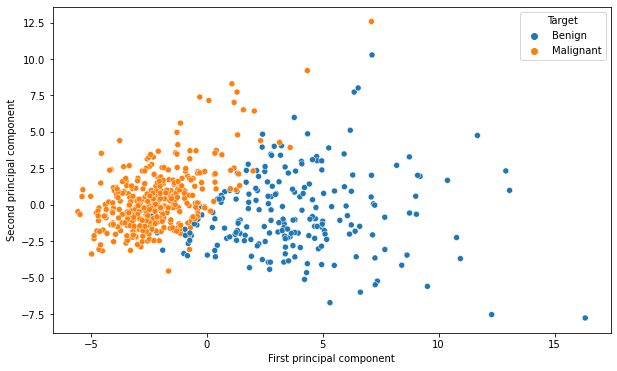

In [161]:
#Using seaborn plot
import seaborn as sns
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x = 'Principal Component 1',
                     y = 'Principal Component 2',
                     data=pca_breast_df,
                     hue='target_label')
ax.legend(title="Target")
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

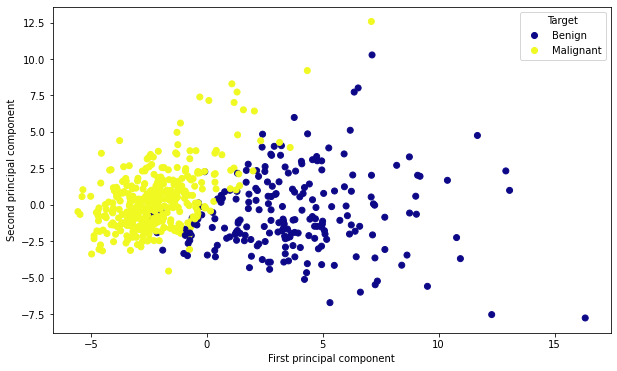

In [184]:
#Display plot for breast cancer data using matplotlib
plt.figure(figsize=(10,6))
scatter = plt.scatter(x=pca_breast_df['Principal Component 1'],
                      y=pca_breast_df['Principal Component 2'],
                      c=pca_breast_df['target'],cmap="plasma")
plt.legend(handles=scatter.legend_elements()[0],labels=['Benign','Malignant'],title="Target")
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()